[[0.76411538085715647, 0.19821638782672404, 0.27372979857071816], [0.19821638782672404, 0.65073396422466512, 0.27566978616711213], [0.27372979857071816, 0.27566978616711213, 0.57160228361164789]]
[[ 0.76411538  0.19821639  0.2737298 ]
 [ 0.19821639  0.65073396  0.27566979]
 [ 0.2737298   0.27566979  0.57160228]]
[ 1.16480471  0.51121639  0.31043053]
1.16480470639
[-0.64032151 -0.71755442 -0.27405113]


/Users/anthonydepalatis/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:94: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/anthonydepalatis/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:95: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


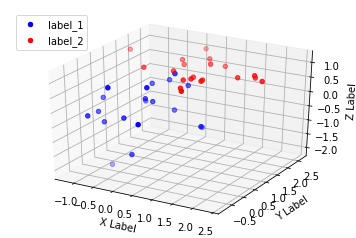

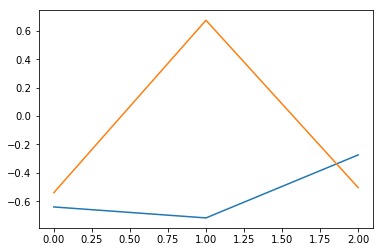

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  2 10:06:44 2017

@author: shammakabir
"""

import numpy as np 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import operator
import scipy



def find_cov(x,y,n):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = 0
    for i in range (0, n):
        mult = (x[i]-x_mean)*(y[i]-y_mean)
        num = num + mult            
    cov = num/(n-1)
    return(cov)

################################part one######################################
mean = [0,0,0]
cov = [[0.5,0,0],[0,0.5,0],[0,0,0.7]]

label_1 = np.random.multivariate_normal(mean,cov,20)
label_1df = pd.DataFrame(label_1)
x_1 = label_1df.iloc[:,0]
y_1 = label_1df.iloc[:,1]
z_1 = label_1df.iloc[:,2]

mean = [1,1,1]
cov = [[0.5,0,0],[0,0.5,0],[0,0,0.01]]

label_2 = np.random.multivariate_normal(mean,cov,20)

label_2df = pd.DataFrame(label_2)

x_2 = label_2df.iloc[:,0]
y_2 = label_2df.iloc[:,1]
z_2 = label_2df.iloc[:,2]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_1, y_1, z_1, c = 'b', label = 'label_1')
ax.scatter(x_2, y_2, z_2, c = 'r', label = 'label_2')
ax.legend(loc='upper left')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


################################part three####################################    
    
con = np.concatenate((label_1, label_2))
con = pd.DataFrame(con)

#print(con)

ds_1 = con.iloc[:,0]
ds_2 = con.iloc[:,1]
ds_3 = con.iloc[:,2]

covar = [[0,0,0],[0,0,0],[0,0,0]]
covar[0][0] = find_cov(ds_1, ds_1, 40)
covar[0][1] = find_cov(ds_1, ds_2, 40)
covar[0][2] = find_cov(ds_1, ds_3, 40)
covar[1][0] = covar[0][1]
covar[1][1] = find_cov(ds_2, ds_2, 40)
covar[1][2] = find_cov(ds_2, ds_3, 40)
covar[2][0] = covar[0][2]
covar[2][1] = covar[1][2]
covar[2][2] = find_cov(ds_3, ds_3, 40)

print(covar)
print np.cov((ds_1, ds_2, ds_3))

################################part four####################################

values, vectors = np.linalg.eig(covar)
temp = values
print(values)
index, value = max(enumerate(values), key=operator.itemgetter(1))
print(value)
for i in values:
    if values[i] == value:
        values[i] = -9999
index2, value = max(enumerate(values), key=operator.itemgetter(1))
print(vectors[index])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(vectors[index])
ax2.plot(vectors[index2])
plt.show()